In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Javascript
import shap
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [6]:
df.drop([' Current Liability to Liability', ' Net Income Flag'], axis = 1, inplace= True)

In [7]:
df.shape

(6819, 94)

# Separating the dataset

In [8]:
X = df.drop(['Bankrupt?'], axis = 1)
y = df['Bankrupt?']

# Selecting features with the Recursive Feature Elimination

In [9]:
X1 = X.copy()

In [10]:
scaler = StandardScaler()
scaler.fit(X1) 
scaler.transform(X1)
X1_sc = pd.DataFrame(scaler.transform(X1), columns=X1.columns)


In [242]:
from sklearn.feature_selection import RFE

clf = RandomForestClassifier()
rfe = RFE(clf, n_features_to_select=70, verbose=False)
sel = rfe.fit(X1_sc, y)

In [243]:
# After we run the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df_RFE = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
#pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df_RFE['Column_name'] = pd.DataFrame(X1_sc).columns
#df.head()
df_RFE[df_RFE['Rank']==1]

,Rank,Column_name
0,1,ROA(C) before interest and depreciation befor...
1,1,ROA(A) before interest and % after tax
2,1,ROA(B) before interest and depreciation after...
3,1,Operating Gross Margin
4,1,Realized Sales Gross Margin
...,...,...
88,1,Net Income to Stockholder's Equity
89,1,Liability to Equity
90,1,Degree of Financial Leverage (DFL)
91,1,Interest Coverage Ratio (Interest expense to ...


In [244]:
RFE_df = pd.DataFrame(X1, columns=sel.get_feature_names_out())
RFE_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Research and development expense rate,Cash flow rate,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000000e+00,0.458143,0.147950,0.147950,0.147950,0.169141,0.311664,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.263100,0.363725,0.629951,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.032903,0.392913,0.672775,0.166673,0.190643,0.004094,0.147308,0.334015,0.276920,0.676269,0.721275,0.339077,0.903225,0.002022,0.064856,0.593831,4.580000e+08,0.671568,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.716845,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000000e+00,0.461867,0.182251,0.182251,0.182251,0.208944,0.318137,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.264516,0.376709,0.635172,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.025484,0.391590,0.751111,0.127236,0.182419,0.014948,0.056963,0.341106,0.289642,0.308589,0.731975,0.329740,0.931065,0.002226,0.025516,0.593916,2.490000e+09,0.671570,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0.795297,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.550000e+07,0.458521,0.177911,0.177911,0.193713,0.180581,0.307102,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.264184,0.368913,0.629631,0.207516,0.792484,0.005100,0.379093,0.006562,0.092318,0.148036,0.406580,0.014993,0.013387,0.381968,0.829502,0.340201,0.602806,0.000991,0.098162,0.336731,0.277456,0.446027,0.742729,0.334777,0.909903,0.002060,0.021387,0.594502,7.610000e+08,0.671571,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0.774670,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.

# Balancing the dataset: upsampling and downsampling

In [245]:
df_1 = pd.concat([RFE_df, y], axis=1)


In [246]:
y = df_1['Bankrupt?'].astype('int')
X = df_1.drop(['Bankrupt?'], axis=1)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 17)

In [248]:
TRAIN = pd.concat([X_train, y_train], axis=1)
TRAIN.shape

(5455, 71)

In [249]:
(TRAIN[TRAIN["Bankrupt?"]==1])

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Research and development expense rate,Cash flow rate,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
1868,0.519768,0.538051,0.558060,0.622595,0.622595,0.999066,0.797430,0.809328,0.303392,0.781587,5.010000e+09,0.465974,0.174877,0.174877,0.174877,0.215940,0.322841,0.102598,0.172629,0.022061,0.847966,0.689149,0.689149,0.217564,7.380000e+09,0.263509,0.386023,0.632316,0.097197,0.902803,0.005325,0.373542,0.005366,0.102562,0.171631,0.396874,0.088456,0.022581,0.398408,0.792863,0.474841,0.459619,0.100335,0.095271,0.353342,0.276990,0.919886,0.734525,0.329928,0.937487,0.002242,0.041187,0.593967,1.292516e-04,0.671564,0.329928,0.112116,0.634688,0.457146,0.605097,0.313420,0.032234,0.798835,0.623977,0.622592,0.840240,0.278029,0.027053,0.566160,0.039145,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,0.000000e+00,0.465705,0.154187,0.154187,0.154187,0.193722,0.321674,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.263371,0.384077,0.630228,0.151465,0.848535,0.005047,0.379743,0.005366,0.077727,0.147561,0.397925,0.089955,0.028065,0.378497,0.725754,0.161575,0.225815,0.018851,0.098715,0.348716,0.276580,0.615848,0.729825,0.331509,0.906902,0.001831,0.024161,0.593889,2.030000e+09,0.671519,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0.739555,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
6641,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,0.781340,0.000000e+00,0.465222,0.131010,0.131010,0.131010,0.164792,0.326307,0.074098,0.091738,0.018849,0.847953,0.687465,0.687465,0.217496,2.570000e+08,0.261368,0.445615,0.630567,0.268706,0.731294,0.005033,0.402534,0.007171,0.074055,0.090634,0.471817,0.244378,0.090161,0.378983,0.740426,0.465562,0.739236,0.108758,0.239915,0.350564,0.272963,0.858173,0.727664,0.391128,0.852516,0.001931,0.136224,0.593912,3.330000e+09,0.671564,0.391128,0.144985,0.609092,0.456023,0.649732,0.282216,0.050780,0.557733,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,0.011797,1
233,0.469458,0.539

## Upsampling the minority class

In [250]:
upsample_indexes = np.random.choice(TRAIN[TRAIN["Bankrupt?"]==1].index, size = 400, replace=True).tolist()

In [251]:
upsample = TRAIN.loc[upsample_indexes,:]
upsample

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Research and development expense rate,Cash flow rate,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
1755,0.270365,0.183221,0.291397,0.604275,0.604275,0.998093,0.795529,0.807501,0.302108,0.780270,1.830000e+09,0.459955,0.136404,0.136404,0.136404,0.136806,0.314706,0.040795,0.080289,0.021972,0.847600,0.686709,0.686709,0.217377,2.800000e+09,0.259599,0.360139,0.630514,0.239079,0.760921,0.005330,0.401521,0.005366,0.040810,0.079278,0.413216,0.070465,0.025161,0.358642,0.685899,0.330475,0.460014,0.027860,0.215307,0.336931,0.276670,0.864132,0.718338,0.355119,0.837568,0.001976,0.196535,0.593846,3.060000e+09,0.671556,0.355119,0.124968,0.623400,0.457169,0.536140,0.305295,0.072964,0.503219,0.623648,0.604271,0.770996,0.302056,0.026760,0.565007,0.013768,1
1866,0.462146,0.524531,0.511055,0.598899,0.598899,0.998993,0.797370,0.809302,0.303441,0.781545,1.550000e+09,0.462146,0.175340,0.175340,0.175340,0.211118,0.318880,0.101132,0.168487,0.022028,0.847956,0.689107,0.689061,0.217554,6.070000e+09,0.263404,0.378404,0.629506,0.147474,0.852526,0.006753,0.375384,0.006568,0.100982,0.167529,0.407968,0.160420,0.043548,0.399799,0.857701,0.615321,0.741154,0.075123,0.109029,0.342257,0.277169,0.699973,0.740729,0.331908,0.931436,0.002219,0.020121,0.593983,4.950000e+09,0.671578,0.331908,0.119519,0.653707,0.461137,0.572247,0.316567,0.022907,0.794709,0.624463,0.598894,0.839926,0.281358,0.026298,0.560754,0.024730,1
6105,0.430556,0.470508,0.472027,0.595267,0.595267,0.998923,0.797263,0.809196,0.303400,0.781445,7.130000e+08,0.461537,0.152459,0.152459,0.152459,0.189468,0.317960,0.086882,0.150109,0.021985,0.847802,0.687583,0.687583,0.217390,4.910000e+09,0.263011,0.376979,0.630260,0.200139,0.799861,0.005137,0.382649,0.007756,0.086871,0.149129,0.412095,0.209895,0.073871,0.390131,0.755278,0.566560,0.654182,0.039400,0.197148,0.341082,0.280145,0.943567,0.732521,0.342119,0.910057,0.002056,0.041534,0.593917,1.830000e+09,0.671568,0.342119,0.113492,0.631152,0.457763,0.567370,0.311202,0.047094,0.753568,0.623464,0.595262,0.834026,0.288518,0.026691,0.564629,0.017228,1
55,0.472091,0.5

## Clustering to downsize the majority class

In [252]:
No_bankrupcies =  TRAIN[(TRAIN['Bankrupt?'] == 0)]

In [253]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(No_bankrupcies)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(No_bankrupcies, kmeans.predict(No_bankrupcies)))

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 1.5040946667240587e+23
Iteration 1, inertia 9.427153830160568e+22
Iteration 2, inertia 9.014382940358702e+22
Iteration 3, inertia 8.816503159939341e+22
Iteration 4, inertia 8.806533140451227e+22
Iteration 5, inertia 8.806373121901766e+22
Converged at iteration 5: center shift 16845481167820.355 within tolerance 33509890189168.78.
Initialization complete
Iteration 0, inertia 1.4985484708532346e+23
Iteration 1, inertia 9.47698168135037e+22
Iteration 2, inertia 9.03937497507767e+22
Iteration 3, inertia 8.896961781698715e+22
Iteration 4, inertia 8.873376456785582e+22
Iteration 5, inertia 8.86870794988029e+22
Iteration 6, inertia 8.867702798191022e+22
Iteration 7, inertia 8.867497295265393e+22
Iteration 8, inertia 8.867472372633892e+22
Converged at iteration 8: center shift 20236843175951.88 within tolerance 33509890189168.78.
Initialization complete
Iteration 0, inertia 1.3793902200690536e+23
Iteration

Training a K-Means model with 4 clusters! 

Initialization complete
Iteration 0, inertia 6.777601215813386e+22
Iteration 1, inertia 4.34069430368727e+22
Iteration 2, inertia 4.207317435237328e+22
Iteration 3, inertia 4.191768333695548e+22
Iteration 4, inertia 4.188412174601732e+22
Iteration 5, inertia 4.18686299580362e+22
Iteration 6, inertia 4.185786170121624e+22
Iteration 7, inertia 4.185544067064605e+22
Iteration 8, inertia 4.185540751767251e+22
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 7.016688538401288e+22
Iteration 1, inertia 4.429889118917367e+22
Iteration 2, inertia 4.2404704465040034e+22
Iteration 3, inertia 4.2085244651523e+22
Iteration 4, inertia 4.197285409469438e+22
Iteration 5, inertia 4.1905192356186184e+22
Iteration 6, inertia 4.187136964434239e+22
Iteration 7, inertia 4.185962288984032e+22
Iteration 8, inertia 4.185689028817033e+22
Iteration 9, inertia 4.18547717935048e+22
Iteration 10, inertia 4.185391591077328e+22
Iter

Iteration 13, inertia 3.546761846606532e+22
Iteration 14, inertia 3.544259241802857e+22
Iteration 15, inertia 3.544057893946274e+22
Iteration 16, inertia 3.544016019561567e+22
Converged at iteration 16: strict convergence.
Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 4.798428506637343e+22
Iteration 1, inertia 3.4550702878573126e+22
Iteration 2, inertia 3.402432715583581e+22
Iteration 3, inertia 3.389739559781145e+22
Iteration 4, inertia 3.3836025800457676e+22
Iteration 5, inertia 3.3794114633036095e+22
Iteration 6, inertia 3.3762788796150474e+22
Iteration 7, inertia 3.3747320926682118e+22
Iteration 8, inertia 3.3728367912911836e+22
Iteration 9, inertia 3.3716475524633076e+22
Iteration 10, inertia 3.370824857141548e+22
Iteration 11, inertia 3.3705763579909573e+22
Iteration 12, inertia 3.3704383497343596e+22
Iteration 13, inertia 3.3703716411465464e+22
Iteration 14, inertia 3.3703063638503917e+22
Iteration 15, inertia 3.3702442589444112e+22
Ite

Iteration 6, inertia 3.185055461183552e+22
Iteration 7, inertia 3.1831372872631693e+22
Iteration 8, inertia 3.1821755034389824e+22
Iteration 9, inertia 3.181536899332411e+22
Iteration 10, inertia 3.181006160549251e+22
Iteration 11, inertia 3.1807156502968633e+22
Iteration 12, inertia 3.1805804024802937e+22
Iteration 13, inertia 3.1802514327512677e+22
Iteration 14, inertia 3.1796631215134285e+22
Iteration 15, inertia 3.1791407986786894e+22
Iteration 16, inertia 3.1784586620546975e+22
Iteration 17, inertia 3.177963163094089e+22
Iteration 18, inertia 3.177698812165807e+22
Iteration 19, inertia 3.1775679798349266e+22
Iteration 20, inertia 3.177367187419803e+22
Iteration 21, inertia 3.177011425257033e+22
Iteration 22, inertia 3.176897053840232e+22
Iteration 23, inertia 3.1767989527639444e+22
Iteration 24, inertia 3.1767571597045824e+22
Iteration 25, inertia 3.176753524817855e+22
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 4.281256100215463e+22

Iteration 0, inertia 3.7847813482420636e+22
Iteration 1, inertia 2.8160262457087123e+22
Iteration 2, inertia 2.698456857394201e+22
Iteration 3, inertia 2.6665514848426777e+22
Iteration 4, inertia 2.6551806430590206e+22
Iteration 5, inertia 2.648523362505649e+22
Iteration 6, inertia 2.6453872481160902e+22
Iteration 7, inertia 2.643841230119443e+22
Iteration 8, inertia 2.643179003990939e+22
Iteration 9, inertia 2.6429476452267125e+22
Iteration 10, inertia 2.642848460037951e+22
Iteration 11, inertia 2.642770524464459e+22
Iteration 12, inertia 2.6427445990260514e+22
Converged at iteration 12: center shift 18383074923975.746 within tolerance 33509890189168.78.
Initialization complete
Iteration 0, inertia 3.851918567358834e+22
Iteration 1, inertia 2.82990026967213e+22
Iteration 2, inertia 2.7070437733836308e+22
Iteration 3, inertia 2.6918154134320883e+22
Iteration 4, inertia 2.688218526521043e+22
Iteration 5, inertia 2.6863084293100182e+22
Iteration 6, inertia 2.6851615991887657e+22
Iteratio

Training a K-Means model with 9 clusters! 

Initialization complete
Iteration 0, inertia 2.796592852041695e+22
Iteration 1, inertia 2.1170648130374253e+22
Iteration 2, inertia 1.983324550347427e+22
Iteration 3, inertia 1.957080119645859e+22
Iteration 4, inertia 1.9509883041773915e+22
Iteration 5, inertia 1.9467502930237537e+22
Iteration 6, inertia 1.945645897822044e+22
Iteration 7, inertia 1.9453285368615278e+22
Iteration 8, inertia 1.945242533441382e+22
Iteration 9, inertia 1.9452258631644776e+22
Iteration 10, inertia 1.9452170233698364e+22
Iteration 11, inertia 1.945209127426812e+22
Iteration 12, inertia 1.9452069101865968e+22
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2.9541934872928654e+22
Iteration 1, inertia 2.3705744027162507e+22
Iteration 2, inertia 2.3230639022608113e+22
Iteration 3, inertia 2.2574574277699633e+22
Iteration 4, inertia 2.198134897596124e+22
Iteration 5, inertia 2.1504753897168305e+22
Iteration 6, inertia 2.063967

Iteration 0, inertia 2.7640583695777447e+22
Iteration 1, inertia 1.9256748495756623e+22
Iteration 2, inertia 1.800097945486292e+22
Iteration 3, inertia 1.779173462563434e+22
Iteration 4, inertia 1.7728898530412465e+22
Iteration 5, inertia 1.7711418977400492e+22
Iteration 6, inertia 1.7702829617158818e+22
Iteration 7, inertia 1.7698033102021863e+22
Iteration 8, inertia 1.7695616670489266e+22
Iteration 9, inertia 1.7694635970809643e+22
Iteration 10, inertia 1.7694345076394674e+22
Iteration 11, inertia 1.7694288930382033e+22
Converged at iteration 11: center shift 31964002708207.9 within tolerance 33509890189168.78.
Initialization complete
Iteration 0, inertia 2.5672236248415517e+22
Iteration 1, inertia 2.1505943091583356e+22
Iteration 2, inertia 2.06752873251484e+22
Iteration 3, inertia 2.0312715677132955e+22
Iteration 4, inertia 1.9918283233906483e+22
Iteration 5, inertia 1.9705907559386753e+22
Iteration 6, inertia 1.9578071875437266e+22
Iteration 7, inertia 1.9499755430527317e+22
Itera

Iteration 11, inertia 1.6493203790276902e+22
Iteration 12, inertia 1.6482293336012638e+22
Iteration 13, inertia 1.6479390189491862e+22
Iteration 14, inertia 1.6478131372630477e+22
Iteration 15, inertia 1.6477856336982294e+22
Iteration 16, inertia 1.647778428536509e+22
Iteration 17, inertia 1.6477696950895966e+22
Converged at iteration 17: center shift 26445019759810.688 within tolerance 33509890189168.78.
Initialization complete
Iteration 0, inertia 2.725126636930848e+22
Iteration 1, inertia 1.9329492061871304e+22
Iteration 2, inertia 1.7674898540100586e+22
Iteration 3, inertia 1.7428784312542367e+22
Iteration 4, inertia 1.7344783863725374e+22
Iteration 5, inertia 1.7312457613639235e+22
Iteration 6, inertia 1.7275676957369046e+22
Iteration 7, inertia 1.724124646175767e+22
Iteration 8, inertia 1.7215833568012424e+22
Iteration 9, inertia 1.7201936824939517e+22
Iteration 10, inertia 1.7190031424672816e+22
Iteration 11, inertia 1.7178818947215658e+22
Iteration 12, inertia 1.717121084565811

Iteration 6, inertia 1.5777370623470379e+22
Iteration 7, inertia 1.571117324614467e+22
Iteration 8, inertia 1.5672583172272352e+22
Iteration 9, inertia 1.565764906835261e+22
Iteration 10, inertia 1.5652332685517908e+22
Iteration 11, inertia 1.5648560221877097e+22
Iteration 12, inertia 1.5647061405586543e+22
Iteration 13, inertia 1.5646834679427925e+22
Iteration 14, inertia 1.564666088678045e+22
Iteration 15, inertia 1.5646611404522808e+22
Iteration 16, inertia 1.5646591829307313e+22
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 2.2245725212617535e+22
Iteration 1, inertia 1.7249029549544402e+22
Iteration 2, inertia 1.666735778509277e+22
Iteration 3, inertia 1.6213609870494144e+22
Iteration 4, inertia 1.5885601345458519e+22
Iteration 5, inertia 1.5741159654522735e+22
Iteration 6, inertia 1.5655167361266164e+22
Iteration 7, inertia 1.5599491643776004e+22
Iteration 8, inertia 1.5569572392798888e+22
Iteration 9, inertia 1.5547977530198513e+22
It

Iteration 9, inertia 1.4666918972965668e+22
Iteration 10, inertia 1.466459684217331e+22
Iteration 11, inertia 1.466086913599587e+22
Iteration 12, inertia 1.465858399323808e+22
Iteration 13, inertia 1.4657326055020372e+22
Iteration 14, inertia 1.4657129432331594e+22
Iteration 15, inertia 1.4657082803322895e+22
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 2.1928880933617426e+22
Iteration 1, inertia 1.70082765886007e+22
Iteration 2, inertia 1.613183171284067e+22
Iteration 3, inertia 1.5770340654604041e+22
Iteration 4, inertia 1.5543900547029181e+22
Iteration 5, inertia 1.5358567415841628e+22
Iteration 6, inertia 1.5170705551850385e+22
Iteration 7, inertia 1.505234870149014e+22
Iteration 8, inertia 1.4967762402088558e+22
Iteration 9, inertia 1.4900009790067656e+22
Iteration 10, inertia 1.4854766690997253e+22
Iteration 11, inertia 1.4828818541828561e+22
Iteration 12, inertia 1.4805801779762274e+22
Iteration 13, inertia 1.4788605126211294e+22
It

Iteration 1, inertia 1.5574958920350174e+22
Iteration 2, inertia 1.4749295602853145e+22
Iteration 3, inertia 1.4398958455837455e+22
Iteration 4, inertia 1.421363714324869e+22
Iteration 5, inertia 1.4139216782545664e+22
Iteration 6, inertia 1.410190997908093e+22
Iteration 7, inertia 1.4079057087314574e+22
Iteration 8, inertia 1.4067520119910584e+22
Iteration 9, inertia 1.4059357325186325e+22
Iteration 10, inertia 1.4055147575829225e+22
Iteration 11, inertia 1.4052919525297166e+22
Iteration 12, inertia 1.405226056211306e+22
Iteration 13, inertia 1.4052131836935358e+22
Iteration 14, inertia 1.4052004188221514e+22
Iteration 15, inertia 1.4051758454678439e+22
Iteration 16, inertia 1.4051472692175725e+22
Iteration 17, inertia 1.4051090685756875e+22
Iteration 18, inertia 1.4050941172167165e+22
Iteration 19, inertia 1.4050817080780877e+22
Iteration 20, inertia 1.4050493267998734e+22
Iteration 21, inertia 1.4050338566596106e+22
Iteration 22, inertia 1.4050290428764014e+22
Iteration 23, inertia 

Iteration 26, inertia 1.2917686858959e+22
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 1.749492718953501e+22
Iteration 1, inertia 1.410533411580468e+22
Iteration 2, inertia 1.380293019530036e+22
Iteration 3, inertia 1.367641932061326e+22
Iteration 4, inertia 1.3620349511051833e+22
Iteration 5, inertia 1.3591132616647927e+22
Iteration 6, inertia 1.3578661048245088e+22
Iteration 7, inertia 1.3570606887350271e+22
Iteration 8, inertia 1.3563543932027135e+22
Iteration 9, inertia 1.3559905932712536e+22
Iteration 10, inertia 1.3555990702265928e+22
Iteration 11, inertia 1.3552494388740325e+22
Iteration 12, inertia 1.3548783680625396e+22
Iteration 13, inertia 1.3544016323911614e+22
Iteration 14, inertia 1.3540836762928198e+22
Iteration 15, inertia 1.353954680189593e+22
Iteration 16, inertia 1.3539202535450009e+22
Iteration 17, inertia 1.3538910811102086e+22
Iteration 18, inertia 1.3538422551771968e+22
Iteration 19, inertia 1.353826051781536e+22
Ite

Iteration 18, inertia 1.223534994536512e+22
Iteration 19, inertia 1.2234883003471238e+22
Iteration 20, inertia 1.22347320866513e+22
Iteration 21, inertia 1.2234690662475323e+22
Iteration 22, inertia 1.2234654315874921e+22
Converged at iteration 22: center shift 23933529535553.92 within tolerance 33509890189168.78.
Initialization complete
Iteration 0, inertia 1.6911323582015715e+22
Iteration 1, inertia 1.2998351127704339e+22
Iteration 2, inertia 1.2474041676345335e+22
Iteration 3, inertia 1.2285112800477616e+22
Iteration 4, inertia 1.2206644644287672e+22
Iteration 5, inertia 1.217391921521381e+22
Iteration 6, inertia 1.2162214422721293e+22
Iteration 7, inertia 1.2156954704441516e+22
Iteration 8, inertia 1.2153723814770343e+22
Iteration 9, inertia 1.2151751800783878e+22
Iteration 10, inertia 1.214931201023941e+22
Iteration 11, inertia 1.2146412178184862e+22
Iteration 12, inertia 1.214393505340356e+22
Iteration 13, inertia 1.2142653884132986e+22
Iteration 14, inertia 1.214248840755009e+22

Iteration 8, inertia 1.2592782123567692e+22
Iteration 9, inertia 1.2578862732374287e+22
Iteration 10, inertia 1.2567684692279162e+22
Iteration 11, inertia 1.2556557606524333e+22
Iteration 12, inertia 1.2545638250001847e+22
Iteration 13, inertia 1.253867529574603e+22
Iteration 14, inertia 1.2533940034421544e+22
Iteration 15, inertia 1.2530480937748912e+22
Iteration 16, inertia 1.2527905275430153e+22
Iteration 17, inertia 1.2526150515789086e+22
Iteration 18, inertia 1.252438256224764e+22
Iteration 19, inertia 1.2522557708648275e+22
Iteration 20, inertia 1.2519931449629907e+22
Iteration 21, inertia 1.2514882284918659e+22
Iteration 22, inertia 1.251131483777512e+22
Iteration 23, inertia 1.2505978810384842e+22
Iteration 24, inertia 1.2499901796303189e+22
Iteration 25, inertia 1.2491808467697789e+22
Iteration 26, inertia 1.248056390213649e+22
Iteration 27, inertia 1.2470394170997652e+22
Iteration 28, inertia 1.2456702637003493e+22
Iteration 29, inertia 1.2433307041721324e+22
Iteration 30, in

Training a K-Means model with 18 clusters! 

Initialization complete
Iteration 0, inertia 1.4515087385616823e+22
Iteration 1, inertia 1.2167875945594517e+22
Iteration 2, inertia 1.1884355266999e+22
Iteration 3, inertia 1.1761947961649208e+22
Iteration 4, inertia 1.1603186482212753e+22
Iteration 5, inertia 1.1324439057452618e+22
Iteration 6, inertia 1.1177407634952914e+22
Iteration 7, inertia 1.110821123254078e+22
Iteration 8, inertia 1.108387924200633e+22
Iteration 9, inertia 1.1065820911170725e+22
Iteration 10, inertia 1.1058142876365171e+22
Iteration 11, inertia 1.1054497837089708e+22
Iteration 12, inertia 1.1052554981456856e+22
Iteration 13, inertia 1.1051137153527032e+22
Iteration 14, inertia 1.1050201789761724e+22
Iteration 15, inertia 1.1048343664919033e+22
Iteration 16, inertia 1.1046843871698287e+22
Iteration 17, inertia 1.1045882757528924e+22
Iteration 18, inertia 1.1045434117801248e+22
Iteration 19, inertia 1.1045122939372918e+22
Iteration 20, inertia 1.1044799406626885e+22
I

Iteration 19, inertia 1.1228257740438576e+22
Iteration 20, inertia 1.1228001100862023e+22
Iteration 21, inertia 1.1227611037018914e+22
Iteration 22, inertia 1.1227321231135256e+22
Iteration 23, inertia 1.1226880586384054e+22
Iteration 24, inertia 1.1226643121015714e+22
Iteration 25, inertia 1.1226419442058124e+22
Iteration 26, inertia 1.122640538447313e+22
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 1.4612071585217872e+22
Iteration 1, inertia 1.1972828204714045e+22
Iteration 2, inertia 1.1789274118110734e+22
Iteration 3, inertia 1.1729481337729437e+22
Iteration 4, inertia 1.1700179347434189e+22
Iteration 5, inertia 1.168463831486066e+22
Iteration 6, inertia 1.1660641552166172e+22
Iteration 7, inertia 1.1608765811932067e+22
Iteration 8, inertia 1.1561467914647174e+22
Iteration 9, inertia 1.1535030735597738e+22
Iteration 10, inertia 1.1514403455123465e+22
Iteration 11, inertia 1.1496001109310552e+22
Iteration 12, inertia 1.1478169544954512e

Iteration 40, inertia 1.0970764463236377e+22
Iteration 41, inertia 1.0964343831034077e+22
Iteration 42, inertia 1.0960829940568657e+22
Iteration 43, inertia 1.096004402747568e+22
Iteration 44, inertia 1.0959526619772487e+22
Iteration 45, inertia 1.0959425238443382e+22
Iteration 46, inertia 1.0959368736388762e+22
Converged at iteration 46: strict convergence.
Initialization complete
Iteration 0, inertia 1.4599142954766722e+22
Iteration 1, inertia 1.1404416506948265e+22
Iteration 2, inertia 1.1087520027682663e+22
Iteration 3, inertia 1.0999332180720976e+22
Iteration 4, inertia 1.0958285995019092e+22
Iteration 5, inertia 1.0931149088450473e+22
Iteration 6, inertia 1.0905962953384508e+22
Iteration 7, inertia 1.0889574104834347e+22
Iteration 8, inertia 1.0881933687286292e+22
Iteration 9, inertia 1.0872507005753216e+22
Iteration 10, inertia 1.085963244827352e+22
Iteration 11, inertia 1.0849216775868606e+22
Iteration 12, inertia 1.084107622023725e+22
Iteration 13, inertia 1.0829721408022709e+

Iteration 3, inertia 1.0527382956489958e+22
Iteration 4, inertia 1.0403356724300396e+22
Iteration 5, inertia 1.0313084400300892e+22
Iteration 6, inertia 1.0259588036055745e+22
Iteration 7, inertia 1.0217623585742045e+22
Iteration 8, inertia 1.0188421929200345e+22
Iteration 9, inertia 1.0159864727604153e+22
Iteration 10, inertia 1.0117244253436408e+22
Iteration 11, inertia 1.0079490966196733e+22
Iteration 12, inertia 1.0050993426853532e+22
Iteration 13, inertia 1.002642717873372e+22
Iteration 14, inertia 1.0010181205977626e+22
Iteration 15, inertia 9.997787385359004e+21
Iteration 16, inertia 9.985921414101088e+21
Iteration 17, inertia 9.976550437508428e+21
Iteration 18, inertia 9.972513416728218e+21
Iteration 19, inertia 9.970850170145943e+21
Iteration 20, inertia 9.970144989424915e+21
Iteration 21, inertia 9.969748052703858e+21
Iteration 22, inertia 9.969487485267652e+21
Iteration 23, inertia 9.969162725324774e+21
Iteration 24, inertia 9.968950528846932e+21
Iteration 25, inertia 9.9686

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

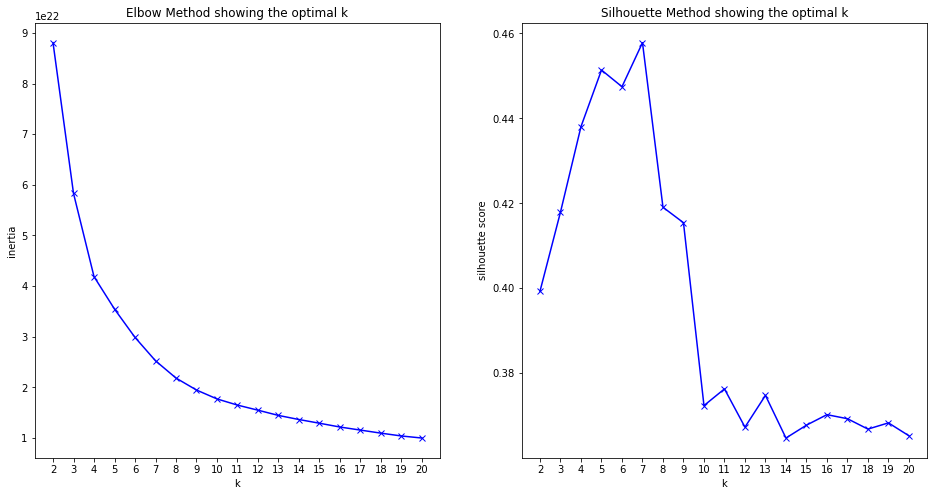

In [254]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [290]:
kmeans = KMeans(n_clusters=10, random_state=1)
kmeans.fit(No_bankrupcies)

KMeans(n_clusters=10, random_state=1)

In [291]:
clusters = kmeans.predict(No_bankrupcies)

elem_in_cluster = pd.Series(clusters).value_counts().sort_index() # Number of values in each cluster
elem_in_cluster

0    987
1    538
2    320
3    228
4    607
5    695
6    725
7    239
8    602
9    338
dtype: int64

In [292]:
clusters_weight = []
for j in range(len(elem_in_cluster)):
    weight = elem_in_cluster[j]/len(No_bankrupcies)
    clusters_weight.append(weight)

In [293]:
No_bankrupcies["cluster"] = clusters
No_bankrupcies


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Research and development expense rate,Cash flow rate,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?,cluster
2542,0.517184,0.595181,0.561647,0.603756,0.603756,0.998997,0.797462,0.809370,0.303594,0.781611,0.000000e+00,0.475932,0.192954,0.192954,0.192954,0.230595,0.330834,0.108135,0.192815,0.022095,0.848005,0.689523,0.689523,0.217599,6.640000e+08,0.264216,0.394127,0.631164,0.088430,0.911570,0.005192,0.371884,0.007290,0.108139,0.191878,0.396305,0.335832,0.064355,0.401404,0.751356,0.171034,0.184907,0.019934,0.057453,0.367288,0.280184,0.603629,0.731964,0.328345,0.951720,0.002341,0.052945,0.593915,6.540000e+08,0.671555,0.328345,0.115561,0.574051,0.439802,0.642290,0.305384,0.047557,0.830270,0.623729,0.603755,0.842314,0.277612,0.026892,0.565597,0.043263,0,4
1809,0.530249,0.538432,0.570962,0.615301,0.615301,0.998959,0.797414,0.809339,0.303588,0.781579,3.356657e-04,0.476161,0.173992,0.173992,0.173992,0.215184,0.323548,0.095106,0.171349,0.022574,0.848154,0.689767,0.689767,0.217631,7.200000e+09,0.265032,0.387663,0.630612,0.047042,0.952958,0.005991,0.369637,0.005366,0.095111,0.170357,0.395876,0.085457,0.019516,0.391895,0.921106,0.787858,0.754803,0.131380,0.042138,0.376574,0.276975,0.806740,0.740325,0.327503,0.922722,0.002253,0.032573,0.594134,1.746463e-04,0.671511,0.327503,0.110933,0.583495,0.428952,0.622632,0.307950,0.008567,0.800269,0.626044,0.615297,0.840279,0.276037,0.026791,0.565158,0.081620,0,5
4322,0.514649,0.579427,0.564484,0.602581,0.602805,0.999006,0.797441,0.809358,0.303537,0.781620,5.930000e+08,0.464811,0.206565,0.206565,0.206565,0.242980,0.326767,0.119941,0.195601,0.022119,0.848002,0.689323,0.689322,0.217585,5.960000e+09,0.263702,0.382307,0.630643,0.121293,0.878707,0.010607,0.369637,0.005754,0.119954,0.194691,0.406797,0.340330,0.075806,0.402535,0.849637,0.563323,0.744841,0.164218,0.119202,0.350225,0.277259,0.929519,0.738858,0.331511,0.948818,0.002334,0.047951,0.593944,5.090000e+09,0.671568,0.331511,0.110933,0.625360,0.455607,0.602408,0.311788,0.024939,0.825276,0.623844,0.602577,0.842345,0.279389,0.026799,0.565198,0.030795,0,6
3

In [294]:
new_No_bankrupcies = pd.DataFrame(columns=No_bankrupcies.columns, dtype=float)
 
for cluster, weight in enumerate(clusters_weight):
    new_No_bankrupcies = pd.concat([new_No_bankrupcies, No_bankrupcies[No_bankrupcies["cluster"]==cluster].sample(round(400*weight))], axis=0)
    
new_No_bankrupcies.drop(columns=['cluster'], inplace=True)

In [295]:
final1_df = pd.concat([new_No_bankrupcies, upsample], axis=0)
final1_df = final1_df.sort_index()

In [296]:
final1_df.shape

(801, 71)

In [297]:
y_train = final1_df['Bankrupt?'].astype('int')
X_train = final1_df.drop(['Bankrupt?'], axis=1)

# Predicting with KNN

In [298]:
# entrenar distintos modelos con distintos valores de k
K = range(2, 14, 3)
accuracies = []
models = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    models.append(knn)
    ypred_train = knn.predict(X_train)
    accuracies.append(accuracy_score(y_train, ypred_train))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(k, accuracy_score(y_train, ypred_train)))
    print("The kappa of the model n_neighbors={} is: {:.2f}".format(k, cohen_kappa_score(y_train, ypred_train)))

The accuracy of the model n_neighbors=2 is: 0.97
The kappa of the model n_neighbors=2 is: 0.94
The accuracy of the model n_neighbors=5 is: 0.83
The kappa of the model n_neighbors=5 is: 0.67
The accuracy of the model n_neighbors=8 is: 0.78
The kappa of the model n_neighbors=8 is: 0.56
The accuracy of the model n_neighbors=11 is: 0.77
The kappa of the model n_neighbors=11 is: 0.55


In [299]:
K = range(2, 14, 3)
#accuracies = []

for i in range(len(models)):
    #knn = KNeighborsClassifier(n_neighbors=k) 
    knn = models[i]
    ypred_test = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, ypred_test))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(list(K)[i], accuracy_score(y_test, ypred_test)))
    print("The kappa score of the model n_neighbors={} is: {:.2f}".format(list(K)[i],cohen_kappa_score(y_test, ypred_test)))

The accuracy of the model n_neighbors=2 is: 0.81
The kappa score of the model n_neighbors=2 is: 0.03
The accuracy of the model n_neighbors=5 is: 0.66
The kappa score of the model n_neighbors=5 is: 0.05
The accuracy of the model n_neighbors=8 is: 0.74
The kappa score of the model n_neighbors=8 is: 0.07
The accuracy of the model n_neighbors=11 is: 0.68
The kappa score of the model n_neighbors=11 is: 0.05


In [300]:
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)
display(y.value_counts())


0    6599
1     220
Name: Bankrupt?, dtype: int64

In [301]:
display(confusion_matrix(ypred_train, y_train))

array([[401,  24],
       [  0, 376]], dtype=int64)

In [302]:
display(confusion_matrix(ypred_test, y_test))

array([[1089,   32],
       [ 231,   12]], dtype=int64)

# Random Forest

In [303]:
clf = RandomForestClassifier(max_depth=4,
                             min_samples_split=6,
                             min_samples_leaf =3,
                             max_samples=0.8, random_state=8)
                            
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the Random Forest in the TRAIN set is 0.95
The accuracy for the Random Forest in the TEST set is 0.88


1    416
0    385
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[372,  29],
       [ 13, 387]], dtype=int64)

0.8951361528103337

0    1161
1     203
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[1158,  162],
       [   3,   41]], dtype=int64)

0.294580057923045

In [304]:
##### from sklearn.model_selection import GridSearchCV

max_depth_choices= [2, 3, 5,7,9] 
min_samples_split_choices = [2,4,6,8,9]  
min_samples_leaf_choices = [1,3] 
max_samples=[0.8,0.5]
#n_jobs = [-1]

grid = {'max_depth': max_depth_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_samples':max_samples}

model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5) 
grid_search.fit(X_train, y_train)
grid_search.best_score_

0.8539440993788819

In [305]:
grid_search.best_params_

{'max_depth': 9,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [306]:
clf = RandomForestClassifier(**grid_search.best_params_, random_state =8)
                          
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the Random Forest in the TRAIN set is 0.98
The accuracy for the Random Forest in the TEST set is 0.89


1    409
0    392
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[389,  12],
       [  3, 397]], dtype=int64)

0.9625478088208248

0    1180
1     184
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[1175,  145],
       [   5,   39]], dtype=int64)

0.30597014925373134

## Feature Extraction-SHAP

In [307]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

In [308]:
#shap.dependence_plot(' Borrowing dependency', shap_values, X)

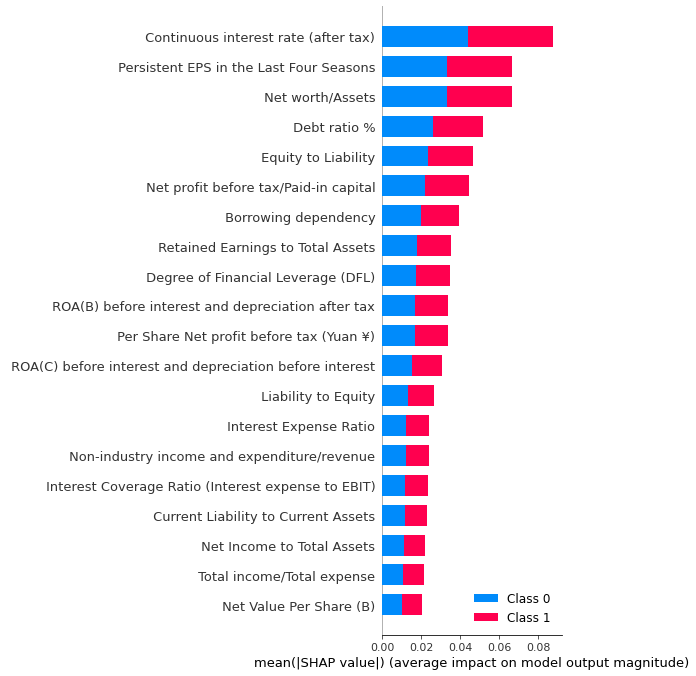

In [309]:
shap.summary_plot(shap_values, X)

# XGBoost

In [310]:
import xgboost as xgb

In [311]:
xgb_cl = xgb.XGBClassifier()

In [312]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [313]:
print("The accuracy for the XGB in the TRAIN set is {:.2f}".format(xgb_cl.score(X_train, y_train)))
print("The accuracy for the XGB in the TEST set is {:.2f}".format(xgb_cl.score(X_test, y_test)))

y_pred = pd.Series(xgb_cl.predict(X_train))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = pd.Series(xgb_cl.predict(X_test))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))

The accuracy for the XGB in the TRAIN set is 1.00
The accuracy for the XGB in the TEST set is 0.91


0    401
1    400
dtype: int64

array([[401,   0],
       [  0, 400]], dtype=int64)

1.0

0    1216
1     148
dtype: int64

array([[1208,  112],
       [   8,   36]], dtype=int64)

0.34229137199434223

Learning_rate: also called eta, it specifies how quickly the model fits the residual errors by using additional base learners.typical values: 0.01–0.2

Gamma, reg_alpha, reg_lambda: these 3 parameters specify the values for 3 types of regularization done by XGBoost - minimum loss reduction to create a new split, L1 reg on leaf weights, L2 reg leaf weights respectively.Typical values for gamma: 0 - 0.5 but highly dependent on the data. Typical values for reg_alpha and reg_lambda: 0 - 1 is a good starting point but again, depends on the data.

Max_depth - how deep the tree's decision nodes can go. Must be a positive integer. typical values: 1–10

Subsample - fraction of the training set that can be used to train each tree. If this value is low, it may lead to underfitting or if it is too high, it may lead to overfitting. typical values: 0.5–0.9

Colsample_bytree- fraction of the features that can be used to train each tree. A large value means almost all features can be used to build the decision tree. typical values: 0.5–0.9

The above are the main hyperparameters people often tune. It is perfectly OK if you don’t understand them all completely (like me) but you can refer to this post which gives a thorough overview of how each of the above parameters works and how to tune them.



In [314]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.01, 0.2],
    "gamma": [0, 0.5, 1],
    "reg_lambda": [0, 0.5, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    "reg_alpha": [0, 0.5, 1, 10]
}

In [315]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [316]:
grid_cv.best_score_


0.9401488796618412

In [317]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.2,
 'max_depth': 5,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [318]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic")
_ = final_cl.fit(X_train, y_train)
preds = final_cl.predict(X_test)

print("The accuracy for the XGB in the TRAIN set is {:.2f}".format(final_cl.score(X_train, y_train)))
print("The accuracy for the XGB in the TEST set is {:.2f}".format(final_cl.score(X_test, y_test)))

y_pred = pd.Series(final_cl.predict(X_train))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = pd.Series(final_cl.predict(X_test))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the XGB in the TRAIN set is 1.00
The accuracy for the XGB in the TEST set is 0.90


1    401
0    400
dtype: int64

array([[400,   1],
       [  0, 400]], dtype=int64)

0.9975031249902587

0    1202
1     162
dtype: int64

array([[1196,  124],
       [   6,   38]], dtype=int64)

0.3352029033322337

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=ftwo_scorer, cv=5)

## Feature extraction-SHAP

In [319]:
explainer = shap.TreeExplainer(final_cl)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [320]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

In [321]:
#shap.dependence_plot(' Tax rate (A)', shap_values, X)

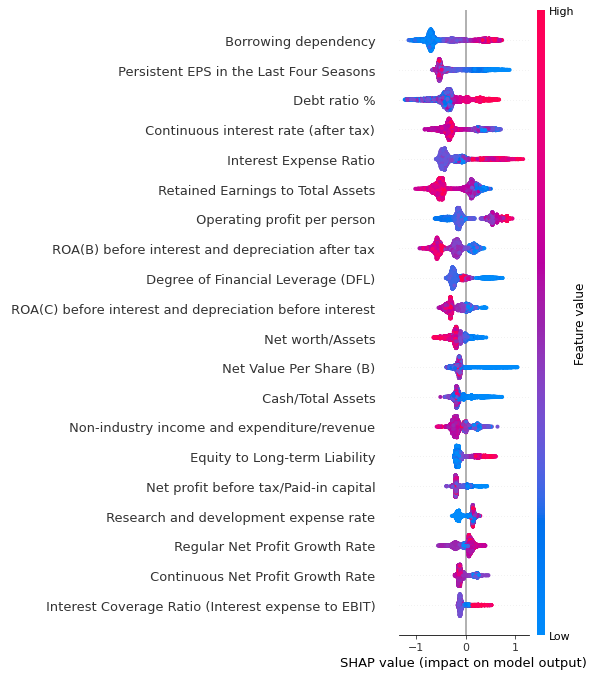

In [322]:
shap.summary_plot(shap_values, X)

# K-fold Cross validation

In [323]:
a = np.zeros(shape=(4, 12))

pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [324]:
# Aplicamos CV-10 a todos los modelos para tner una mejor estimacion del accuracy y menor varianza
nfolds = 10
models = [knn, clf, xgb_cl]
cv_scores = np.zeros((len(models), nfolds))

for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, scoring='roc', cv=nfolds)
    cv_scores[i] = scores
    
cv_df = pd.DataFrame(cv_scores, index=[models])
cv_df['mean_score'] = cv_df.mean(1)
cv_df['std_score'] = cv_df.std(1)

ValueError: 'roc' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.